In [48]:
# Importing necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset
dataset = pd.read_csv('titanicsurvived.csv')

# Displaying the first few rows of the dataset
print(dataset.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


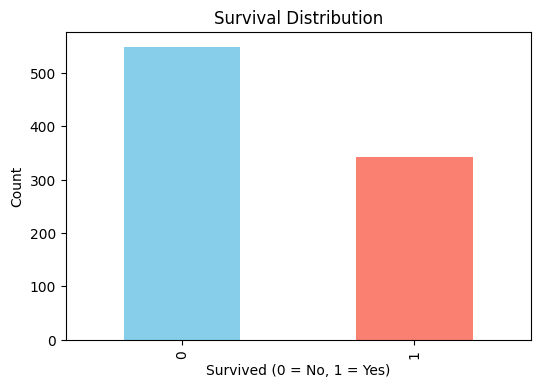

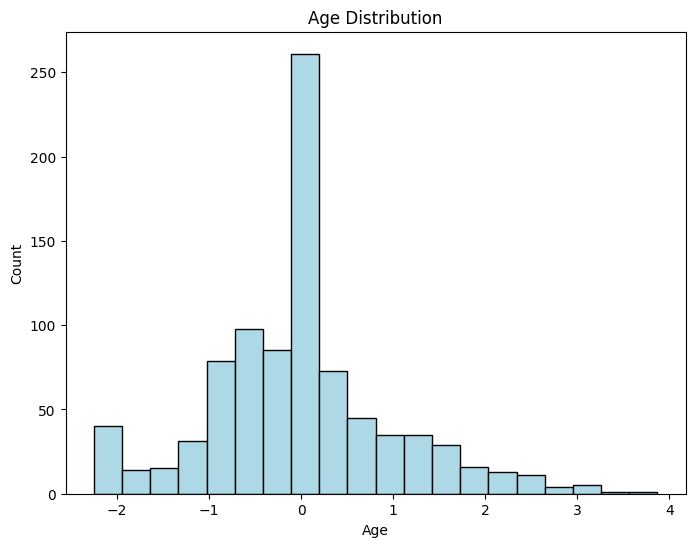

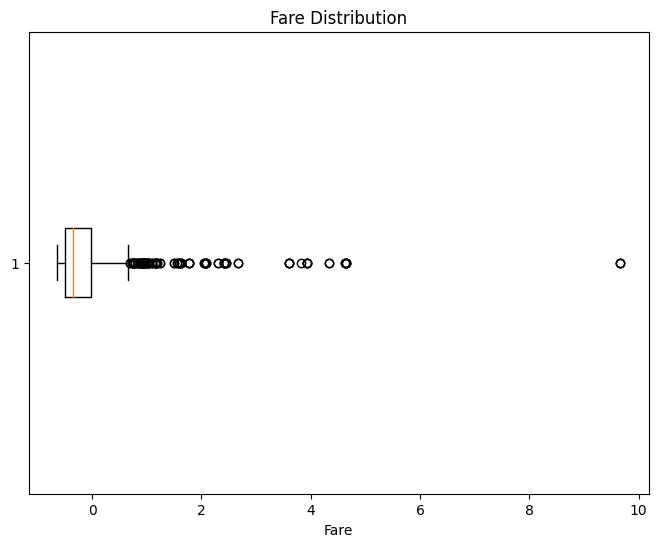

In [49]:
# Basic Data Preprocessing

# Handling missing values in the 'Age' column
imputer = SimpleImputer(strategy='mean')
dataset['Age'] = imputer.fit_transform(dataset[['Age']])

# Handling missing values in the 'Embarked' column
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

# Encoding categorical columns ('Sex' and 'Embarked')
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])

# One-hot encoding the 'Embarked' column
embarked_onehot = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
dataset = pd.concat([dataset, embarked_onehot], axis=1)
dataset.drop('Embarked', axis=1, inplace=True)

# Normalizing numerical columns ('Age', 'SibSp', 'Parch', 'Fare')
scaler = StandardScaler()
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

# Basic Data Visualization

# Bar plot for 'Survived' column
plt.figure(figsize=(6, 4))
dataset['Survived'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Histogram for 'Age' column
plt.figure(figsize=(8, 6))
plt.hist(dataset['Age'], bins=20, color='lightblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Box plot for 'Fare' column
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['Fare'], vert=False)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()


In [50]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Assuming you have already loaded the dataset
# ...

# Handling missing values in the 'Age' column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset[['Age']])
dataset[['Age']] = imputer.transform(dataset[['Age']])

# Encoding 'Sex' column (male=1, female=0)
le = LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex'])  # Removed extra square brackets

# Selecting relevant columns for the dataset
df = dataset[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare']]

# Separating features (x) and target variable (y)
x = df.drop('Survived', axis=1).values
y = df['Survived'].values

# Displaying the first few rows of the modified dataset
print(df.head())



   Survived  Pclass  Sex       Age     SibSp      Fare
0         0       3    1 -0.592481  0.432793 -0.502445
1         1       1    0  0.638789  0.432793  0.786845
2         1       3    0 -0.284663 -0.474545 -0.488854
3         1       1    0  0.407926  0.432793  0.420730
4         0       3    1  0.407926 -0.474545 -0.486337


In [5]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming you have already loaded the dataset
# ...

# Handling missing values in the 'Age' column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset[['Age']])
dataset[['Age']] = imputer.transform(dataset[['Age']])

# Encoding 'Sex' column (male=1, female=0)
le = LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex'])  # Removed extra square brackets

# Selecting relevant columns for the dataset
df = dataset[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare']]

# Separating features (x) and target variable (y)
x = df.drop('Survived', axis=1).values
y = df['Survived'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Displaying the first few rows of the modified dataset
print(df.head())


   Survived  Pclass  Sex       Age     SibSp      Fare
0         0       3    1 -0.592481  0.432793 -0.502445
1         1       1    0  0.638789  0.432793  0.786845
2         1       3    0 -0.284663 -0.474545 -0.488854
3         1       1    0  0.407926  0.432793  0.420730
4         0       3    1  0.407926 -0.474545 -0.486337


In [6]:
#DT
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth =6,min_samples_leaf=10,random_state=0).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.84
Accuracy of Decision Tree classifier on test set: 0.80


In [7]:
from sklearn.svm import SVC
classifiersvc = SVC(kernel = 'sigmoid', random_state = 0)
classifiersvc.fit(X_train, y_train)
# Predicting the Test set results with C-Support Vector Classification algorithm
y_pred_svc = classifiersvc.predict(X_test)
svc = classifiersvc.score(X_train,y_train)
print('Accuracy of svm train:{:.2f}'.format(dt.score(X_train, y_train)))
print('Accuracy of svm test:{:.2f}'.format(dt.score(X_test, y_test)))

Accuracy of svm train:0.84
Accuracy of svm test:0.80


In [8]:
#random forest
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(max_depth=6)
randomforest.fit(X_train, y_train)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8156424581005587


In [9]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, randomforest.predict(X_test))
print('the confusion matrix\n', confusion)

the confusion matrix
 [[97  8]
 [25 49]]


In [10]:
#logistic regresion
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression().fit(X_train, y_train)
logr_predicted = logr.predict(X_test)
confusion = confusion_matrix(y_test, logr_predicted)
print('The accuracy of the logistic regresion Model of train is:{:.2f}'.format(logr.score(X_train, y_train)))
print('The accuracy of the logistic regresion Model of train is:{:.2f}'.format(logr.score(X_test, y_test)))
print('Logistic regression classifier (default settings)\n', confusion)

The accuracy of the logistic regresion Model of train is:0.80
The accuracy of the logistic regresion Model of train is:0.79
Logistic regression classifier (default settings)
 [[89 16]
 [21 53]]


In [11]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.7988826815642458


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


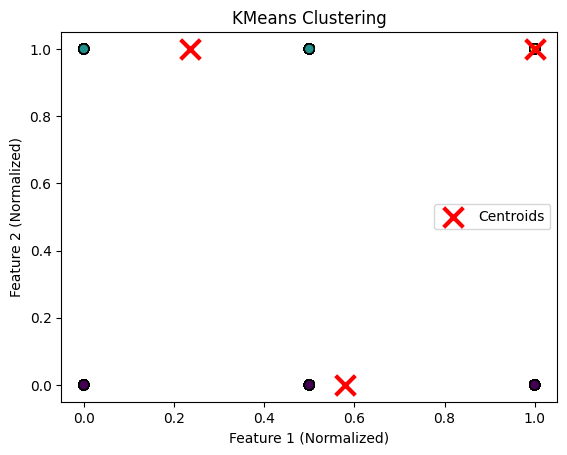

In [14]:
#kmeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed the dataset (X, y)
# ...

# Using make_blobs for demonstration purpose
# X, y = make_blobs(random_state=10)

# Instantiate KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Normalize the data using MinMaxScaler
X_norm = MinMaxScaler().fit_transform(x)

# Fit KMeans to the normalized data
kmeans.fit(X_norm)

# Plotting the clusters using a scatter plot
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=kmeans.labels_, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


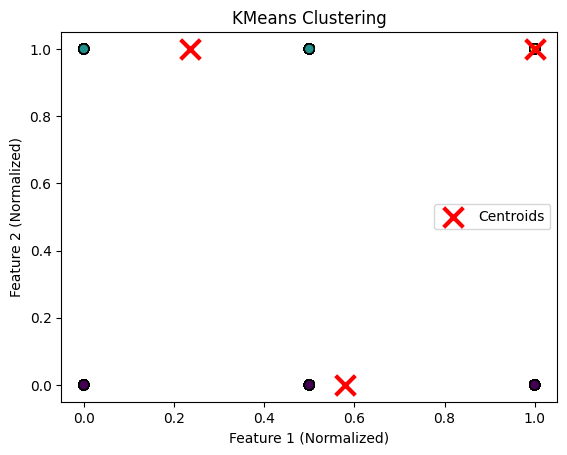

In [15]:
#DBSCAN
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed the dataset (X, y)
# ...

# Using make_blobs for demonstration purpose
# X, y = make_blobs(random_state=10)

# Instantiate KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Normalize the data using MinMaxScaler
X_norm = MinMaxScaler().fit_transform(x)

# Fit KMeans to the normalized data
kmeans.fit(X_norm)

# Plotting the clusters using a scatter plot
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=kmeans.labels_, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.legend()
plt.show()


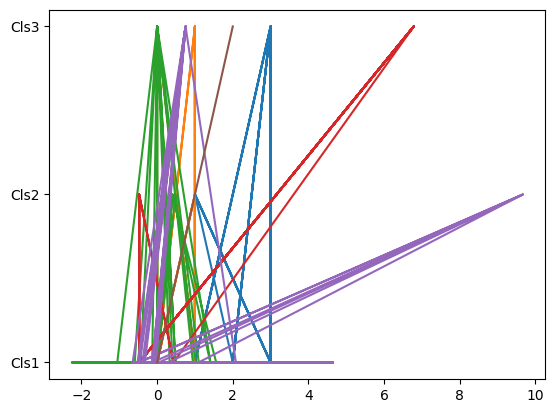

In [16]:
#agglomerative
from sklearn.cluster import AgglomerativeClustering
cls=AgglomerativeClustering(n_clusters=3,linkage='single')
cls_assignment=cls.fit_predict(x)

plt.plot(x,cls_assignment,['Cls1','Cls2','Cls3'])

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, logr_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, logr_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, logr_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, logr_predicted)))

Accuracy: 0.79
Precision: 0.77
Recall: 0.72
F1: 0.74


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logr_predicted, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [23]:
print(x.shape)
print(y.shape)


(891, 5)
(100,)


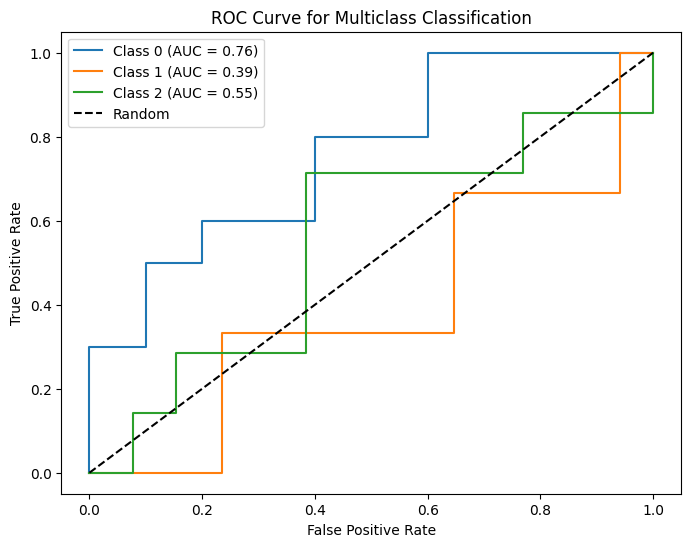

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already loaded and preprocessed the dataset (x, y)

# Placeholder data (replace this with your actual dataset loading and preprocessing)
np.random.seed(42)
x = np.random.rand(100, 5)  # Example features with 100 samples and 5 features
y = np.random.randint(0, 3, 100)  # Example labels with 3 classes (0, 1, 2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Normalize features (standardization in this case)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate Logistic Regression model using OneVsRestClassifier
lr = OneVsRestClassifier(LogisticRegression())

# Fit the model and obtain decision function scores
y_score = lr.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(lr.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == lr.classes_[i]).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(lr.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lr.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.show()





In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Placeholder data (replace this with your actual dataset loading and preprocessing)
np.random.seed(42)
X_train = np.random.rand(80, 5)  # Example features with 80 samples and 5 features for training
y_train = np.random.randint(0, 3, 80)  # Example labels with 3 classes (0, 1, 2) for training
X_test = np.random.rand(20, 5)  # Example features with 20 samples and 5 features for testing
y_test = np.random.randint(0, 3, 20)  # Example labels with 3 classes (0, 1, 2) for testing

# Normalize features (standardization in this case)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate SVM model with RBF kernel
svm = SVC(kernel='rbf', probability=True)

# Create a OneVsRestClassifier with the SVM model
svm_ovr = OneVsRestClassifier(svm)

# Define the parameter grid for GridSearchCV
param_grid = {'estimator__C': [0.1, 1, 10],
              'estimator__gamma': [0.001, 0.01, 0.1, 1]}

# Create GridSearchCV with accuracy scoring
grid_search = GridSearchCV(svm_ovr, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Grid best parameter (max. accuracy): ", grid_search.best_params_)
print("Grid best score (accuracy): ", grid_search.best_score_)

# Get the accuracy on the test set
y_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", test_accuracy)


Grid best parameter (max. accuracy):  {'estimator__C': 0.1, 'estimator__gamma': 0.1}
Grid best score (accuracy):  0.4375
Test set accuracy:  0.2


In [36]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

clf = Pipeline([
    ('feature_reduction', PCA(n_components=2)),
    ('classification', DecisionTreeClassifier())
])

clf.fit(X_train, y_train)

print(accuracy_score(y_test, clf.predict(X_test)))


0.5


In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Placeholder data (replace this with your actual dataset loading and preprocessing)
np.random.seed(42)
x = np.random.rand(100, 5)  # Example features with 100 samples and 5 features
y = np.random.randint(0, 3, 100)  # Example labels with 3 classes (0, 1, 2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Normalize features (standardization in this case)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kfold = KFold(n_splits=10, shuffle=True)  # Set shuffle to True
xyz = []
accuracy = []
std = []
classifiers = ['Naive Bayes', 'Linear Svm', 'Radial Svm', 'Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']
models = [GaussianNB(), SVC(kernel='linear', decision_function_shape='ovr'), SVC(decision_function_shape='ovr'),
          LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=9),
          RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
models_dataframe


,CV Mean,Std
Naive Bayes,0.3125,0.115244
Linear Svm,0.3250,0.160078
Radial Svm,0.2500,0.147902
Logistic Regression,0.4250,0.187083
Decision Tree,0.3250,0.100000
KNN,0.3000,0.169558
Random Forest,0.2875,0.112500


In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Placeholder data (replace this with your actual dataset loading and preprocessing)
np.random.seed(42)
x = np.random.rand(100, 5)  # Example features with 100 samples and 5 features
y = np.random.randint(0, 3, 100)  # Example labels with 3 classes (0, 1, 2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

# Normalize features (standardization in this case)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = [
    GaussianNB(),
    SVC(kernel='linear', decision_function_shape='ovr'),  # Specify 'ovr' for multi-class
    SVC(decision_function_shape='ovr'),  # Specify 'ovr' for multi-class
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=9),
    RandomForestClassifier(n_estimators=100)
]

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=22)
xyz = []
accuracy = []
std = []
classifiers = ['Naive Bayes', 'Linear Svm', 'Radial Svm', 'Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']

for model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring="accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
print(models_dataframe)


                     CV Mean       Std
Naive Bayes           0.3375  0.168170
Linear Svm            0.3875  0.130504
Radial Svm            0.3000  0.114564
Logistic Regression   0.3875  0.171847
Decision Tree         0.3750  0.185405
KNN                   0.3250  0.127475
Random Forest         0.3125  0.128087
